In [1]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """
    生成y=Xw+b+噪声
    X指特征值，Y指噪声值
    """
    X = torch.normal(0,1,(num_examples,len(w)))
    Y = torch.matmul(X,w)+b
    Y += torch.normal(0,0.1,Y.shape)
    return X,Y.reshape(-1,1)
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)
features,labels

(tensor([[ 0.5038, -0.9800],
         [ 1.2158,  1.6058],
         [-1.8898,  1.1421],
         ...,
         [ 1.5391, -0.4182],
         [-1.3922,  1.0790],
         [-0.8363, -0.4876]]),
 tensor([[ 8.7302],
         [ 1.1245],
         [-3.5322],
         [10.3629],
         [ 3.1530],
         [ 4.2578],
         [ 0.6901],
         [ 7.6236],
         [-5.2771],
         [ 4.8905],
         [ 8.4987],
         [ 0.4061],
         [ 8.4219],
         [ 8.5111],
         [ 2.8930],
         [ 3.5492],
         [ 8.3376],
         [ 2.9701],
         [12.3885],
         [ 2.1618],
         [-1.3566],
         [ 1.7844],
         [ 0.5923],
         [10.6979],
         [-0.9539],
         [ 5.0897],
         [ 4.5667],
         [-5.5895],
         [-2.0108],
         [ 0.1818],
         [ 3.8406],
         [-0.5233],
         [ 2.7299],
         [ 2.5505],
         [ 0.8910],
         [ 4.1846],
         [ 4.2992],
         [ 7.0218],
         [-0.1977],
         [-0.2045],
         [

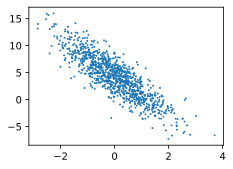

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [4]:
def data_iter(batch_size, features, labels):
    '''
    接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。 
    每个小批量包含一组特征和标签。
    '''
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.3551,  1.0660],
        [ 1.5794,  1.4273],
        [-1.9270, -2.4063],
        [ 0.2545, -0.1043],
        [ 1.5790, -1.0136],
        [ 0.7618,  0.1270],
        [-0.8582,  0.8083],
        [ 0.4149, -0.4590],
        [ 0.5742,  0.3621],
        [ 0.1669,  0.8790]]) 
 tensor([[-0.1224],
        [ 2.5780],
        [ 8.5699],
        [ 4.8451],
        [10.8790],
        [ 5.5569],
        [-0.1821],
        [ 6.6605],
        [ 4.2509],
        [ 1.6804]])


In [6]:
# 初始化参数
w = torch.tensor([12.0,0],requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [7]:
def linreg(X,w,b):
    '''线性回归模型'''
    return torch.matmul(X,w) + b

In [8]:
# 损失函数
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2 / 2

In [9]:
# 优化算法
def sgd(params,lr,batch_size):
    '''小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
        

In [10]:
lr = 0.05
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size, features, labels):
        l = loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.007649
epoch 2, loss 0.004644
epoch 3, loss 0.004660
epoch 4, loss 0.004636
epoch 5, loss 0.004633
